Can I make one page-sized plot that contains all the interesting detail?

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from matplotlib import cm
from astropy.convolution import convolve, Box1DKernel
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
t1data = Table.read('../../common/quicksaves/2MASS-J23062928-0502285_basic.ecsv')
w, f, e = t1data['WAVELENGTH'], t1data['FLUX'], t1data['ERROR']

In [4]:
m1data = Table.read('saved_models/trappist-1_model_const_res_v07.ecsv')
m1w, m1f =  m1data['WAVELENGTH'], m1data['FLUX']

Cross sections

In [14]:
cs_path = '/home/david/work/muscles/cross_sections/'
cs = glob.glob('{}*_cs.txt'.format(cs_path))
cs

['/home/david/work/muscles/cross_sections/H2_cs.txt',
 '/home/david/work/muscles/cross_sections/CH4_cs.txt',
 '/home/david/work/muscles/cross_sections/O3_cs.txt',
 '/home/david/work/muscles/cross_sections/CO2_cs.txt',
 '/home/david/work/muscles/cross_sections/H2O_cs.txt',
 '/home/david/work/muscles/cross_sections/N2_cs.txt',
 '/home/david/work/muscles/cross_sections/O2_cs.txt',
 '/home/david/work/muscles/cross_sections/N2O_cs.txt']

/home/david/work/muscles/cross_sections/H2_cs.txt
/home/david/work/muscles/cross_sections/CH4_cs.txt
/home/david/work/muscles/cross_sections/O3_cs.txt
/home/david/work/muscles/cross_sections/CO2_cs.txt
/home/david/work/muscles/cross_sections/H2O_cs.txt
/home/david/work/muscles/cross_sections/N2_cs.txt
/home/david/work/muscles/cross_sections/O2_cs.txt
/home/david/work/muscles/cross_sections/N2O_cs.txt


(700.0, 2300.0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


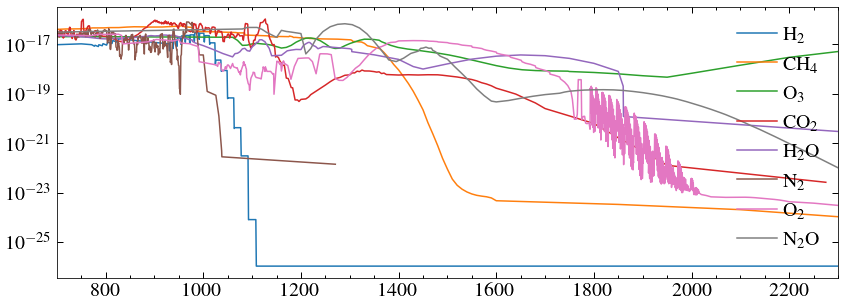

In [6]:
def make_mol_label(name): #turns molcule filenames into formated labels
    #print(name)
    label = r''
    for l in name:
        if l.isalpha():
            label +=l.upper()
        elif l.isnumeric():
            label += '$_{{{}}}$'.format(l)
    return label

for section in cs:
    print(section)
    mol = np.genfromtxt(section, names=True)
    filename = os.path.split(section)[1]
    label = make_mol_label(filename[:-7])
    molcs = convolve(mol['Total'],Box1DKernel(5))

    plt.plot(mol['Lambda'], molcs, label=label)
plt.legend()
#plt.xscale('log')
plt.yscale('log')
    #plt.ylim(1e-17)
#plt.xlim(11, 110000)
plt.xlim(700, 2300)    

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


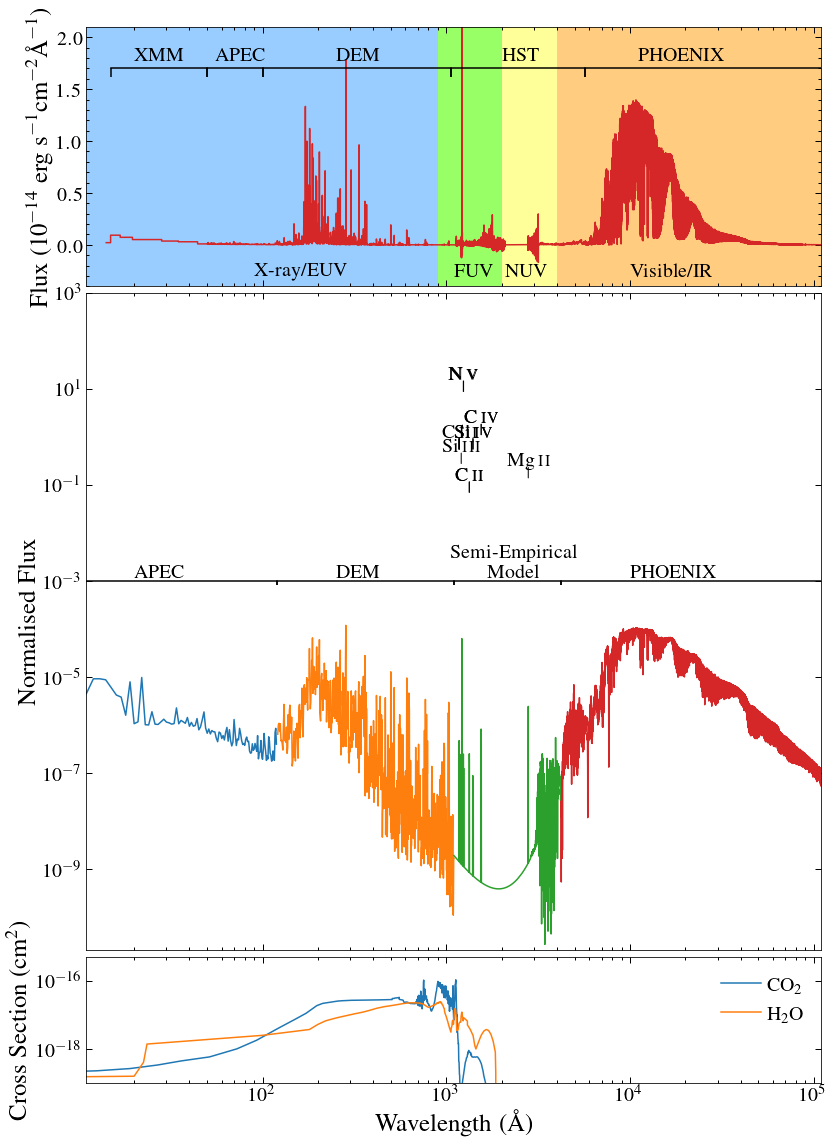

In [67]:
fig, ax = plt.subplots(figsize=(12, 16))
gs = GridSpec(8, 1, figure=fig)


plt.subplot(gs[0:2])
labely = 1.7
labelfac = 1.05
plt.errorbar((15,50),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('XMM', (20, labelfac*labely))

plt.errorbar((50,100),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('APEC', (55, labelfac*labely))

plt.errorbar((100,1060),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('DEM', (250, labelfac*labely))

plt.errorbar((1068, 5692),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('HST', (2000, labelfac*labely))

plt.errorbar((5692, 130000),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('PHOENIX', (11000, labelfac*labely))

#plt.annotate('Lya', (1215, labelfac*labely), horizontalalignment='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

#plt.errorbar((1200, 1230),(labely*1.05, labely*1.05), yerr= [[0.05*labely,0.05*labely],[0,0]], c ='k')


#plt.step(w[f>0], f[f>0],label ='TRAPPIST-1 (M8)', where='mid')
plt.step(w, f*1e14,label ='TRAPPIST-1 (M8)', where='mid', C='C3')
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100, 1000)

#plt.xlim(90, 10000)

plt.fill_between([0,900],-1,3, facecolor='#99ccff')
#plt.annotate('X-ray/EUV: Thermosphere heating/removal', (12, 1e-22))

plt.fill_between([900,2000],-1,3, facecolor='#99ff66')
plt.fill_between([2000,4000],-1,3, facecolor='#ffff99')
#plt.annotate('FUV/NUV:\n Photochemistry', (1000, 1e-22))


plt.fill_between([4000,130000],-1,3, facecolor='#ffcc80')
#plt.annotate('Visible/IR: \n Atmosphere \& surface heating', (4100, 1e-22))
plt.annotate('Visible/IR', (10000, -0.3))
plt.annotate('NUV', (2100, -0.3))
plt.annotate('FUV',(1100, -0.3))
plt.annotate('X-ray/EUV', (90, -0.3))

plt.xlim(11, 110000)
plt.ylim(-0.4, 2.1)
#plt.ylim(1e-18, 0.2e-11)
#plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (10$^{-14}$ erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.xticks(visible=False)





plt.subplot(gs[2:7])
mw_bol = np.trapz(m1f, m1w)

comp_ranges = [[5, 120],[120, 1100],[1100, 4200],[4200, 130000]]
for comp in comp_ranges:
    mask = (m1w > comp[0]) & (m1w < comp[1])
    plt.plot(m1w[mask], m1f[mask]/mw_bol)

labely = 1e-3
efac = 0.2
labelfac = 1.2
    
plt.errorbar((5,120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
plt.annotate('APEC', (20, labelfac*labely))

plt.errorbar((120,1100),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
plt.annotate('DEM', (250, labelfac*labely))

plt.errorbar((1100, 4200),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
plt.annotate('Semi-Empirical\n Model', (2300, labelfac*labely), ha='center')

plt.errorbar((4200,  130000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='k')
plt.annotate('PHOENIX', (10000, labelfac*labely))

plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-11, 1000)

#plt.ylim(1.1e-21, 3.9e-12)
plt.xlim(11, 110000)
plt.xticks(visible=False)

#plt.subplot(413)
#plt.step(w, f*1e14,label ='TRAPPIST-1 (M8)', where='mid', C='C3')
#plt.plot(m1w, m1f*1e14)
#plt.xlim(1100, 3980)
#plt.yscale('log')

#plt.xticks(visible=False)
plt.ylabel('Normalised Flux', size=25)



ciii_1175 = [1174.93,1175.26,1175.59,1175.71,1175.99]
siiii_1206 = [1206.51]
nv_1240 = [1238.821, 1242.804]
ci_1288 = [1288.918]
feii_1292 = [1292.405]
cii_1335 = [1334.532, 1335.708]
feii_1527 = [1527.2397] 
civ_1550 = [1548.195,1550.77]
mgii_2800 = [2795.528]

measured_lines = [ciii_1175, [1206.51], nv_1240, cii_1335, [1393.755], [1402.77], civ_1550, [2795.523]]

tform = np.array([4.9, 4.8, 5.3, 4.6, 4.9, 4.9, 5, 4.7])
plot_name = np.array(['C\,{\sc iii}', 'Si\,{\sc iii}', 'N\,{\sc v}', 'C\,{\sc ii}', 'Si\,{\sc iv}','Si\,{\sc iv}',
                       'C\,{\sc iv}', 'Mg\,{\sc ii}'])  
dv = -56.3*u.km/u.s

#liney = np.full(len(plot_name), 10)
liney = 1e-15*(10**tform)**3
linefac = 2
for i, lineset in enumerate(measured_lines):
    name = plot_name[i]
    if i == 0:
        line = np.mean(lineset)
        dv_line = dv.to(u.AA, equivalencies=u.doppler_optical(line*u.AA)).value
        plt.annotate(name,(dv_line, liney[i]), xytext=(dv_line,  liney[i]*linefac), horizontalalignment='center')
    else:
        dv_lines = [dv.to(u.AA, equivalencies=u.doppler_optical(line*u.AA)).value for line in lineset]
        [plt.annotate(name,(dv_line, liney[i]), xytext=(dv_line,  liney[i]*linefac), horizontalalignment='center') for dv_line in dv_lines]


    dv_lines = [dv.to(u.AA, equivalencies=u.doppler_optical(line*u.AA)).value for line in lineset]
    [plt.annotate('',(dv_line, liney[i]), xytext=(dv_line, liney[i]*linefac),arrowprops=dict(arrowstyle='-'), horizontalalignment='center') for dv_line in dv_lines]

plt.subplot(gs[7:])
cs2p = ['CO2', 'H2O'] #cross sections to plot
for section in cs:
    #print(section)
    filename = os.path.split(section)[1]
    #print(filename[:-7])
    if filename[:-7] in cs2p:
        mol = np.genfromtxt(section, names=True)

        label = make_mol_label(filename[:-7])
        molcs = convolve(mol['Total'],Box1DKernel(5))

        plt.plot(mol['Lambda'], molcs, label=label)
plt.legend()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1.1e-20, 5e-16)
plt.xlim(11, 110000)
plt.ylim(9.9e-20, 5e-16)
plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('Cross Section (cm$^2$)', size=25)
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)

In [8]:
w[-1]

1000000.0